In [2]:
# Importation des packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Importation du fichier GLB.Ts+dSST.csv

df = pd.read_csv('GLB.Ts+dSST.csv', header = 1)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-.22,-.20,-.17,-.16,***,***,-0.11,-0.16,-.19
1,1881,-0.19,-0.13,0.04,0.06,0.08,-0.18,0.01,-0.03,-0.15,-.21,-.17,-.06,-.08,-.09,-.16,0.06,-0.06,-.18
2,1882,0.17,0.14,0.05,-0.15,-0.13,-0.21,-0.16,-0.07,-0.14,-.23,-.16,-.35,-.10,-.08,.08,-0.08,-0.14,-.17
3,1883,-0.28,-0.36,-0.12,-0.18,-0.17,-0.06,-0.07,-0.13,-0.21,-.11,-.24,-.11,-.17,-.19,-.33,-0.15,-0.09,-.19
4,1884,-0.12,-0.08,-0.36,-0.39,-0.33,-0.34,-0.30,-0.27,-0.27,-.24,-.33,-.30,-.28,-.26,-.10,-0.36,-0.31,-.28


In [6]:
# Affichage des infos du dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    143 non-null    int64  
 1   Jan     143 non-null    float64
 2   Feb     143 non-null    float64
 3   Mar     143 non-null    float64
 4   Apr     143 non-null    float64
 5   May     143 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     143 non-null    object 
 11  Nov     143 non-null    object 
 12  Dec     143 non-null    object 
 13  J-D     143 non-null    object 
 14  D-N     143 non-null    object 
 15  DJF     143 non-null    object 
 16  MAM     143 non-null    float64
 17  JJA     143 non-null    float64
 18  SON     143 non-null    object 
dtypes: float64(11), int64(1), object(7)
memory usage: 21.4+ KB


In [7]:
# Remplacement des valeurs *** par NaN

df = df.replace(['***'], np.nan)


In [8]:
# Remplacement des valeurs manquantes par la méthode B-Fill

df.fillna(method='bfill', inplace=True)

In [9]:
# Modification des type de valeurs

dictionnaire = {'Oct': 'float',
                'Nov': 'float',
                'Dec': 'float',
                'J-D': 'float',
                'D-N': 'float',
                'DJF': 'float',
                'SON': 'float',
               }
df = df.astype(dictionnaire)

In [10]:
# Verification des infos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    143 non-null    int64  
 1   Jan     143 non-null    float64
 2   Feb     143 non-null    float64
 3   Mar     143 non-null    float64
 4   Apr     143 non-null    float64
 5   May     143 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     142 non-null    float64
 11  Nov     142 non-null    float64
 12  Dec     142 non-null    float64
 13  J-D     142 non-null    float64
 14  D-N     142 non-null    float64
 15  DJF     143 non-null    float64
 16  MAM     143 non-null    float64
 17  JJA     143 non-null    float64
 18  SON     142 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.4 KB


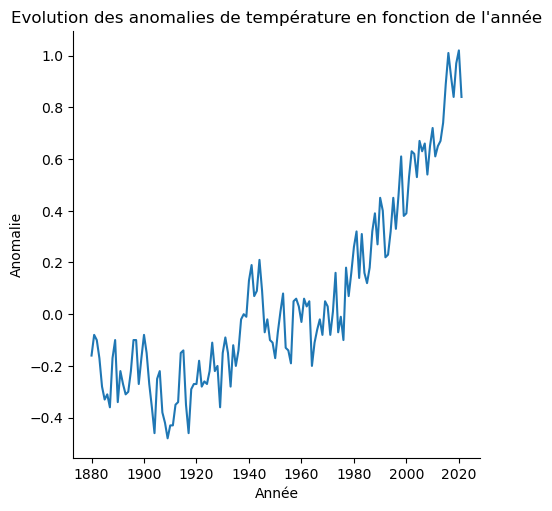

In [11]:
# Courbe décrivant l'évolution des anomalies de température en fonction de l'année
sns.relplot(x='Year', y='J-D', kind='line', data=df);

plt.xlabel('Année');
plt.ylabel('Anomalie');
plt.title("Evolution des anomalies de température en fonction de l'année");


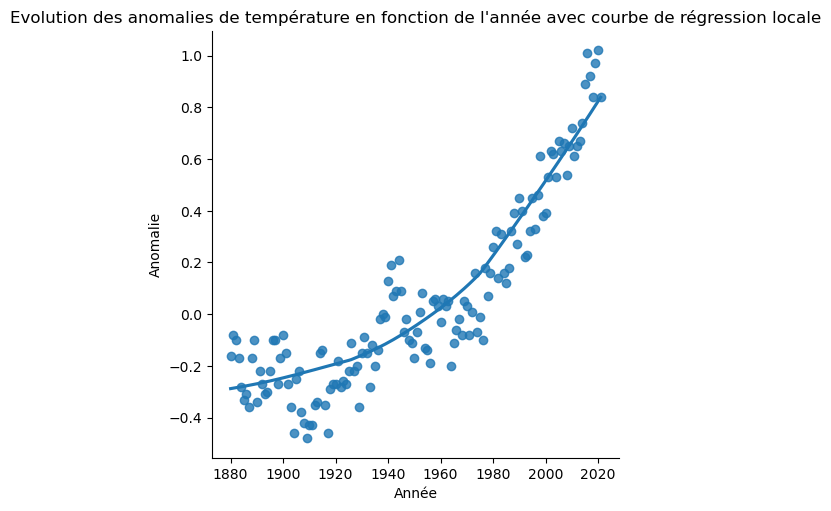

In [12]:
# Courbe lisse par régression locale (LOWESS)
sns.lmplot(x='Year', y='J-D', lowess=True, data=df);

plt.xlabel('Année');
plt.ylabel('Anomalie');
plt.title("Evolution des anomalies de température en fonction de l'année avec courbe de régression locale");

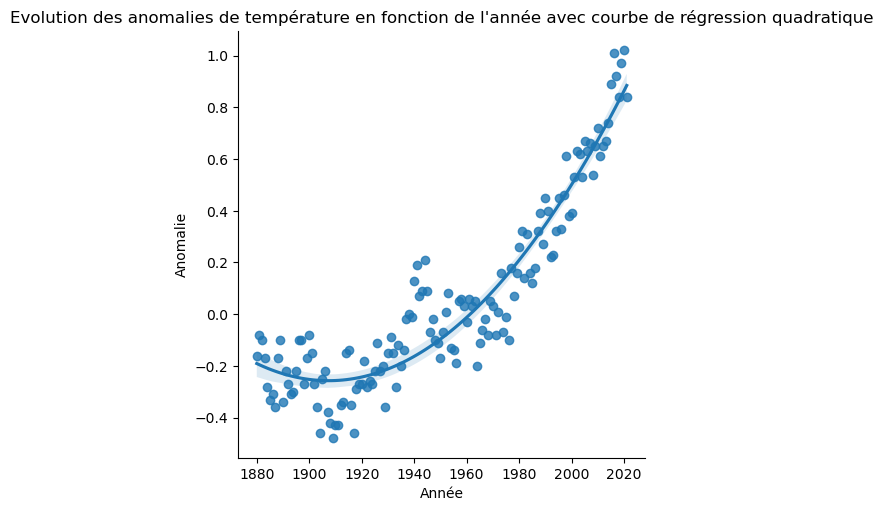

In [13]:
# Courbe lisse par régression polynomiale d’ordre 2 (régression quadratique)
sns.lmplot(x='Year', y='J-D', order=2, data=df);

plt.xlabel('Année');
plt.ylabel('Anomalie');
plt.title("Evolution des anomalies de température en fonction de l'année avec courbe de régression quadratique");

Nous constatons que la variation des températures est à la hausse depuis 1880. On voit qu’à la fin de la révolution industrielle et la fin de l’utilisation massive du charbon, la température a légèrement diminué; mais à partir de 1910 la température a suivi une courbe légèrement exponentielle à la hausse.
Cette augmentation est homogène et suit la même évolution quelque soit la zone et le mois de l’année.
Nous constatons également que cette hausse est plus élevée dans l’hémisphère nord que dans l’hémisphère sud.
Et enfin nous constatons que c’est aux pôles que les variations de températures sont les plus importantes et c’est au pôle Nord que les températures ont le plus augmenté.


In [16]:
# Suppréssion de colonnes

df_transposed = df.drop(['J-D','D-N','DJF','MAM','JJA','SON'], axis=1)

In [17]:
# Transposition du Dataframe

df_transposed.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.18,-0.24,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-0.22,-0.20,-0.17
1,1881,-0.19,-0.13,0.04,0.06,0.08,-0.18,0.01,-0.03,-0.15,-0.21,-0.17,-0.06
2,1882,0.17,0.14,0.05,-0.15,-0.13,-0.21,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35
3,1883,-0.28,-0.36,-0.12,-0.18,-0.17,-0.06,-0.07,-0.13,-0.21,-0.11,-0.24,-0.11
4,1884,-0.12,-0.08,-0.36,-0.39,-0.33,-0.34,-0.30,-0.27,-0.27,-0.24,-0.33,-0.30


In [18]:
# Indexation sur le mois

df_transposed = df_transposed.set_index("Year").T
df_transposed.head()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Jan,-0.18,-0.19,0.17,-0.28,-0.12,-0.58,-0.43,-0.71,-0.33,-0.08,...,0.71,0.76,0.85,1.17,1.02,0.81,0.93,1.16,0.81,0.91
Feb,-0.24,-0.13,0.14,-0.36,-0.08,-0.33,-0.50,-0.56,-0.35,0.17,...,0.62,0.55,0.90,1.37,1.13,0.84,0.94,1.24,0.64,0.89
Mar,-0.08,0.04,0.05,-0.12,-0.36,-0.26,-0.42,-0.35,-0.41,0.07,...,0.67,0.78,0.95,1.36,1.16,0.88,1.17,1.17,0.88,1.05
Apr,-0.15,0.06,-0.15,-0.18,-0.39,-0.41,-0.28,-0.34,-0.19,0.11,...,0.54,0.79,0.76,1.10,0.94,0.89,1.01,1.13,0.75,0.83
May,-0.09,0.08,-0.13,-0.17,-0.33,-0.44,-0.24,-0.30,-0.21,0.00,...,0.61,0.86,0.80,0.95,0.91,0.82,0.85,1.02,0.78,0.83


In [20]:
# Slection des années à garder

columns_to_keep = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# Delete columns by column number using iloc selection
df_transposed = df_transposed.iloc[:, columns_to_keep]
df_transposed.shape

(12, 15)

In [21]:
df_transposed.head()

Year,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Jan,-0.18,-0.41,-0.35,-0.41,-0.24,-0.29,0.00,-0.26,0.00,0.08,0.30,0.41,0.25,0.75,1.16
Feb,-0.24,-0.44,-0.05,-0.40,-0.26,-0.26,0.08,-0.27,0.13,0.22,0.39,0.44,0.56,0.83,1.24
Mar,-0.08,-0.39,0.01,-0.50,-0.12,-0.11,0.10,-0.07,-0.35,0.06,0.30,0.80,0.55,0.92,1.17
Apr,-0.15,-0.29,-0.08,-0.42,-0.24,-0.24,0.18,-0.21,-0.15,0.05,0.30,0.56,0.57,0.84,1.13
May,-0.09,-0.38,-0.08,-0.33,-0.26,-0.23,0.11,-0.11,-0.08,-0.04,0.35,0.45,0.36,0.75,1.02


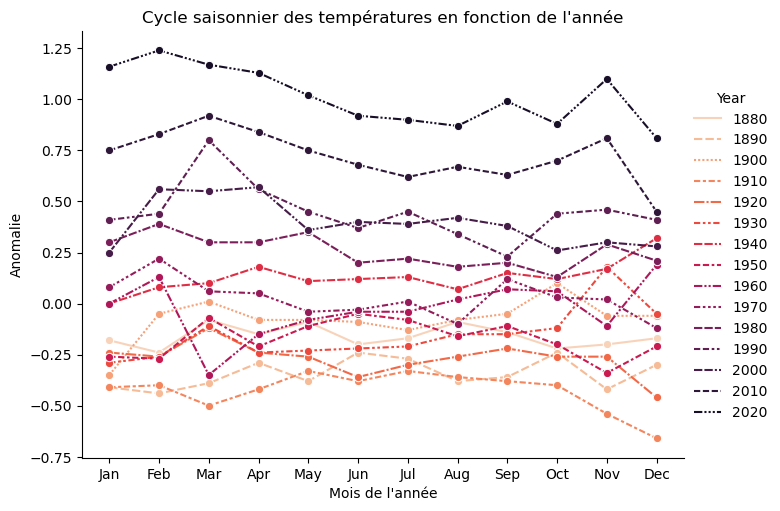

In [24]:
# Création d'un graphe dun cycle saisonnier

p = sns.relplot(kind='line', data=df_transposed, marker = 'o', palette="rocket_r", height=5, aspect=11.7/8.27)


# change the color of line with index 1 in each facet/axis
#for ax in p.axes.flatten():
#    for i, l in enumerate(ax.get_lines()):
#        if i == 1:
#            l.set_color('blue')
            
            
plt.xlabel("Mois de l'année");
plt.ylabel('Anomalie');
plt.title("Cycle saisonnier des températures en fonction de l'année");


Avec cette représentation, nous constatons que les températures ont sensiblement augmentées sur tous les mois de l’année depuis 1880 et que cette tendance s’est renforcée ces 20 dernières années.

In [25]:
# Importation des données de températures par zone

df_zonal = pd.read_csv('ZonAnn.Ts+dSST.csv')
df_zonal.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.05,-0.36,-0.12,-0.02,-0.79,-0.48,-0.26,-0.13,-0.11,-0.05,0.05,0.66
1,1881,-0.08,-0.16,0.00,-0.32,0.11,-0.08,-0.88,-0.43,-0.18,0.11,0.10,-0.06,-0.07,0.58
2,1882,-0.10,-0.20,-0.01,-0.29,-0.04,0.00,-1.38,-0.25,-0.14,-0.03,-0.05,0.00,0.04,0.61
3,1883,-0.17,-0.27,-0.07,-0.33,-0.16,-0.02,-0.16,-0.53,-0.26,-0.17,-0.15,-0.04,0.07,0.48
4,1884,-0.28,-0.42,-0.15,-0.59,-0.14,-0.14,-1.28,-0.62,-0.47,-0.12,-0.17,-0.20,-0.02,0.63


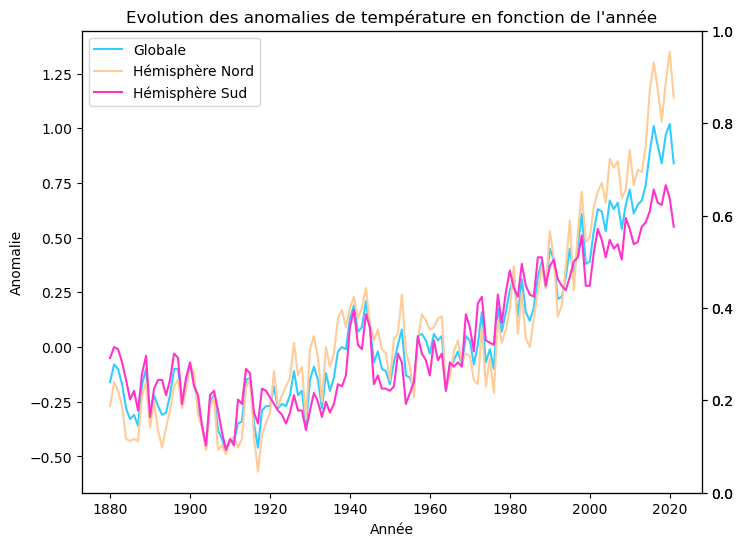

In [27]:
# Comparaison des anomalies Globale+NH+SH

x = df_zonal.Year
y1 = df_zonal.Glob
y2 = df_zonal.NHem
y3 = df_zonal.SHem

fig = plt.figure(figsize=(8,6), facecolor ='w')
ax1 = fig.add_subplot(111)

plt.xlabel('Année');
plt.ylabel('Anomalie');
plt.title("Evolution des anomalies de température en fonction de l'année");

ax2 = ax1.twinx()


ax3 = ax1.twinx()


ax1.plot(y1,color='#33CCFF',linestyle='-',label='Globale')
ax1.plot(y2,color='#FFCC99',linestyle='-',label='Hémisphère Nord')
ax1.plot(y3,color='#FF33CC',linestyle='-',label='Hémisphère Sud')

ax1.legend(loc='best');

plt.xticks()
ax1.set_xticks([0,20,40,60,80,100,120,140])
ax1.set_xticklabels(['1880','1900','1920','1940','1960','1980','2000','2020']);


Nous constatons que les anomalies de températures sont beaucoup plus prononcées dans l'hémisphère Nord que dans l'hémisphère Sud

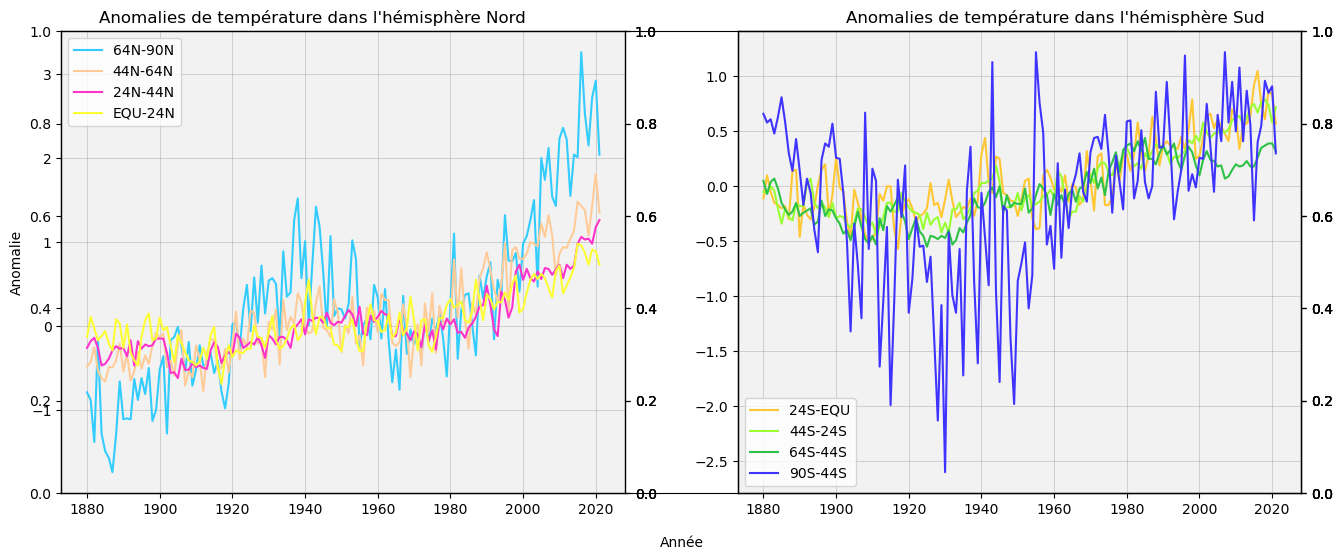

In [28]:
# TEMP Par zone Hémisphère Nord et hémisphère Sud

x = df_zonal.Year
y1 = df_zonal['64N-90N']
y2 = df_zonal['44N-64N']
y3 = df_zonal['24N-44N']
y4 = df_zonal['EQU-24N']
y5 = df_zonal['24S-EQU']
y6 = df_zonal['44S-24S']
y7 = df_zonal['64S-44S']
y8 = df_zonal['90S-64S']


fig = plt.figure(figsize=(16,6))
fig.patch.set_facecolor('white')

plt.xlabel('\n\nAnnée');
plt.ylabel('Anomalie');
plt.title("Anomalies de température dans l'hémisphère Nord                                                             Anomalies de température dans l'hémisphère Sud");

plt.xticks([])

ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax2 = fig.add_subplot(122)
ax5 = ax2.twinx()
ax6 = ax2.twinx()
ax7 = ax2.twinx()
ax8 = ax2.twinx()

ax1.plot(y1,color='#33CCFF',linestyle='-',label='64N-90N')
ax1.plot(y2,color='#FFCC99',linestyle='-',label='44N-64N')
ax1.plot(y3,color='#FF33CC',linestyle='-',label='24N-44N')
ax1.plot(y4,color='#FCFF33',linestyle='-',label='EQU-24N')
ax2.plot(y5,color='#FFC733',linestyle='-',label='24S-EQU')
ax2.plot(y6,color='#99FF33',linestyle='-',label='44S-24S')
ax2.plot(y7,color='#2EC246',linestyle='-',label='64S-44S')
ax2.plot(y8,color='#3F33FF',linestyle='-',label='90S-44S')

ax1.set_facecolor("0.95")
ax2.set_facecolor("0.95")
ax1.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)
ax2.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

plt.xticks()
ax1.set_xticks([0,20,40,60,80,100,120,140])
ax1.set_xticklabels(['1880','1900','1920','1940','1960','1980','2000','2020'])

ax2.set_xticks([0,20,40,60,80,100,120,140])
ax2.set_xticklabels(['1880','1900','1920','1940','1960','1980','2000','2020'])

ax1.legend(loc='best');
ax2.legend(loc='best');